# **Install and Import Dependencies**

In [1]:
!pip install neuralprophet plotly-resampler -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 21.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 40.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 88.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [24]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet
import warnings
warnings.filterwarnings('ignore')

# **Read Data & Processing**

In [3]:
df = pd.read_csv('/kaggle/input/weatheraus/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [5]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

- I'll work on temperature at 9am of Melbourne

In [6]:
# Filtering the Data
melbourne = df[df['Location']=='Melbourne']
melbourne['Date'] = pd.to_datetime(melbourne['Date'])
melbourne.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
65745,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,0.6,No
65746,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,1.4,Yes
65747,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,0.6,No
65748,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,0.0,No
65749,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,0.0,No


In [7]:
melbourne.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2435 entries, 65745 to 68179
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2435 non-null   datetime64[ns]
 1   Location       2435 non-null   object        
 2   MinTemp        2434 non-null   float64       
 3   MaxTemp        2434 non-null   float64       
 4   Rainfall       2298 non-null   float64       
 5   Evaporation    2435 non-null   float64       
 6   Sunshine       2434 non-null   float64       
 7   WindGustDir    2421 non-null   object        
 8   WindGustSpeed  2421 non-null   float64       
 9   WindDir9am     2397 non-null   object        
 10  WindDir3pm     2424 non-null   object        
 11  WindSpeed9am   2433 non-null   float64       
 12  WindSpeed3pm   2435 non-null   float64       
 13  Humidity9am    2432 non-null   float64       
 14  Humidity3pm    2428 non-null   float64       
 15  Pressure9am    2434 n

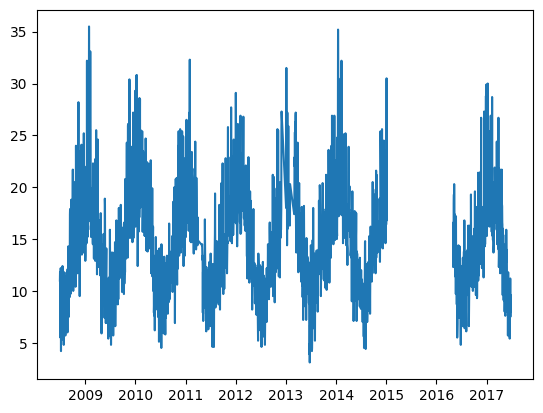

In [8]:
plt.plot(melbourne['Date'],melbourne['Temp9am'])
plt.show()

In [9]:
# Keep years before 2015
melbourne['year'] = melbourne['Date'].apply(lambda x : x.year)
melbourne = melbourne[melbourne['year']<=2015]

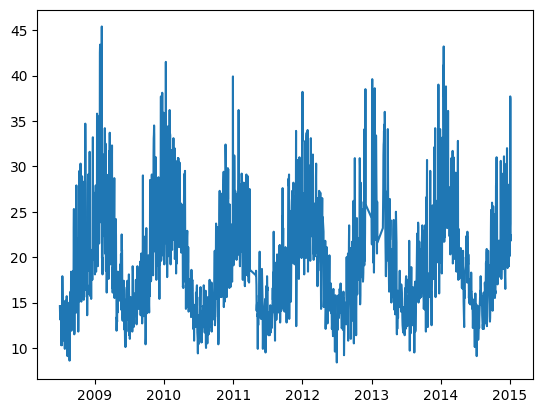

In [10]:
plt.plot(melbourne['Date'], melbourne['Temp3pm'])
plt.show()

In [11]:
# Data for training
data = melbourne[['Date','Temp3pm']]
data.dropna(inplace=True)
data.columns = ['ds','y']
data.head()

,ds,y
65745,2008-07-01,14.6
65746,2008-07-02,13.7
65747,2008-07-03,13.9
65748,2008-07-04,13.1
65749,2008-07-05,14.6


# **Train The Model**

In [12]:
model = NeuralProphet()
model.fit(data ,freq='D', epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 92.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (63) is too small than the required number                     for the learning rate finder (233). The results might not be optimal.
2025-06-02 07:41:12.608629: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748850072.846778      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748850072.908320      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Finding best initial lr:   0%|          | 0/233 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,1.683453,0.0,54.165539,61.555161,1.682054,0.0,0
1,0.903533,0.0,31.739164,41.021973,0.901919,0.0,1
2,0.415356,0.0,16.849319,25.380087,0.415331,0.0,2
3,0.231870,0.0,10.880988,16.293430,0.232033,0.0,3
4,0.127015,0.0,7.103792,9.528378,0.126787,0.0,4
...,...,...,...,...,...,...,...
995,0.036282,0.0,3.010679,3.960924,0.036245,0.0,995
996,0.036269,0.0,3.012406,3.962345,0.036266,0.0,996
997,0.036294,0.0,2.992856,3.972929,0.036241,0.0,997
998,0.036255,0.0,3.004926,3.985396,0.036246,0.0,998


# **Forecast Away**

In [13]:
future = model.make_future_dataframe(data, periods=1000)
forecast = model.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 92.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.9% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.9% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2015-01-06,None,25.129072,20.313114,4.613894,0.202066
1,2015-01-07,None,24.911352,20.313871,4.758955,-0.161474
2,2015-01-08,None,25.116663,20.314631,4.902601,-0.100567
3,2015-01-09,None,25.505112,20.315392,5.044069,0.145651
4,2015-01-10,None,25.895641,20.316151,5.182503,0.396988


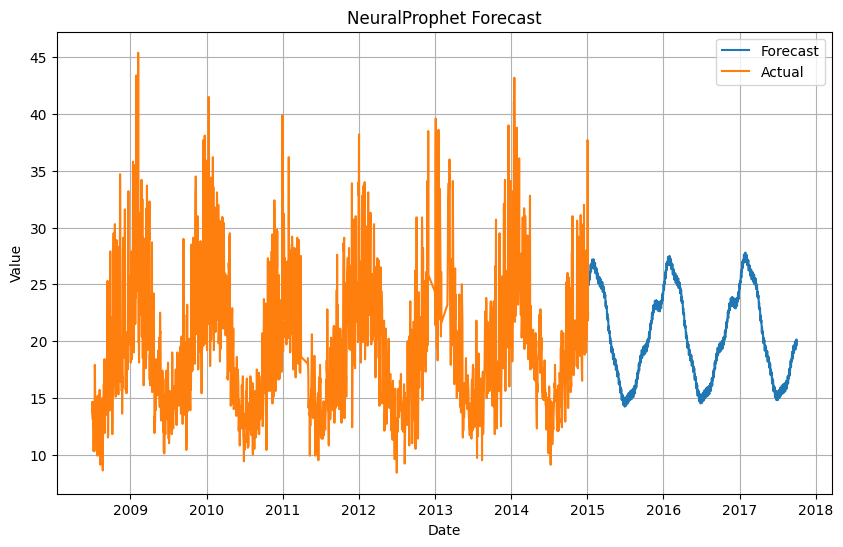

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat1'], label='Forecast')
plt.plot(data['ds'], data['y'], label='Actual')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("NeuralProphet Forecast")
plt.grid(True)
plt.show()

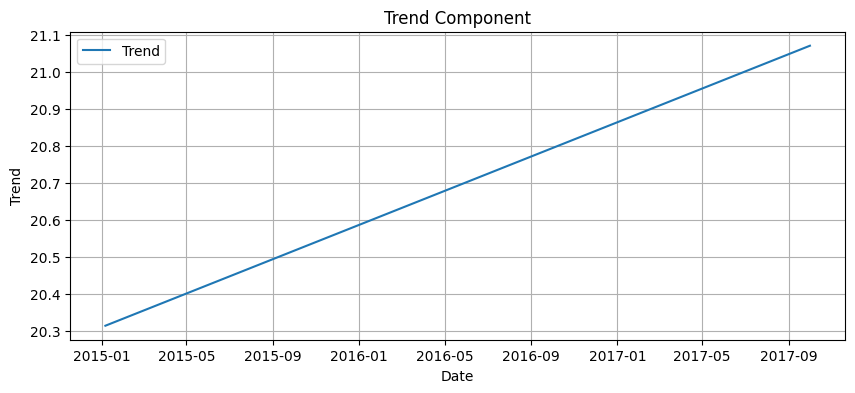

In [25]:
plt.figure(figsize=(10, 4))
plt.plot(forecast['ds'], forecast['trend'], label='Trend')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.grid(True)
plt.legend()
plt.show()

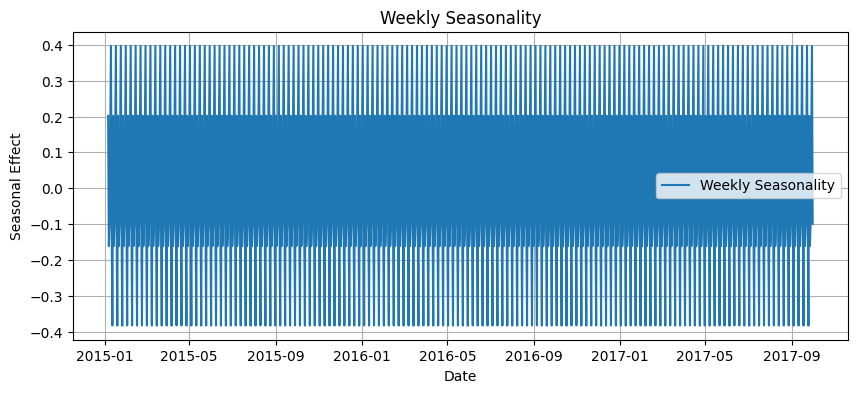

In [26]:
plt.figure(figsize=(10, 4))
plt.plot(forecast['ds'], forecast['season_weekly'], label='Weekly Seasonality')
plt.title('Weekly Seasonality')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')
plt.grid(True)
plt.legend()
plt.show()

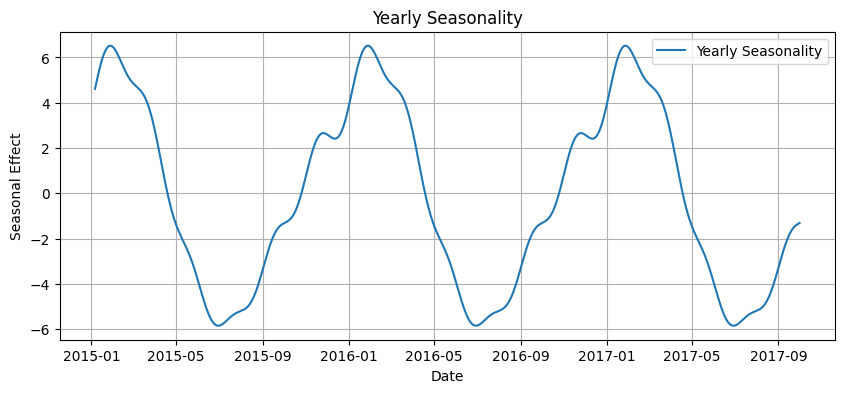

In [27]:
plt.figure(figsize=(10, 4))
plt.plot(forecast['ds'], forecast['season_yearly'], label='Yearly Seasonality')
plt.title('Yearly Seasonality')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')
plt.grid(True)
plt.legend()
plt.show()

# **Save Model**

In [33]:
with open('saved_model.pkl', "wb") as f:
    pickle.dump(model, f)